In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings

warnings.filterwarnings('ignore')

In [486]:
df = pd.read_csv("./diabetes.csv")
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


the describe() method generates descriptive statistics. The describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display
summary for the other columns


In [488]:
df.describe()

,patient_number,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,waist,hip
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,46.774359,65.951282,177.407692,137.133333,83.289744,37.869231,42.992308
std,112.727548,44.666005,53.798188,17.279069,16.435911,3.918867,40.407824,22.859528,13.498192,5.760947,5.664342
min,1.000000,78.000000,48.000000,12.000000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,98.250000,179.000000,81.000000,38.000000,34.000000,63.000000,150.250000,122.000000,75.000000,33.000000,39.000000
50%,195.500000,203.000000,90.000000,46.000000,44.500000,66.000000,173.000000,136.000000,82.000000,37.000000,42.000000
75%,292.750000,229.000000,107.750000,59.000000,60.000000,69.000000,200.000000,148.000000,90.000000,41.000000,46.000000
max,390.000000,443.000000,385.000000,120.000000,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


The "gender" and "diabetes" columns are really boolean and the "patient_number" column is redundant.

In [489]:
df["gender"]=(df["gender"]=="male").astype(int) # having_diabetes = 1 , not_having_diabetes = 0
df["diabetes"]=(df["diabetes"]=="Diabetes").astype(int) # male = 1 , female = 0
df.drop(["patient_number"], axis=1, inplace=True)
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,193,77,49,"3,9",19,0,61,119,"22,5",118,70,32,38,"0,84",0
1,146,79,41,"3,6",19,0,60,135,"26,4",108,58,33,40,"0,83",0
2,217,75,54,4,20,0,67,187,"29,3",110,72,40,45,"0,89",0
3,226,97,70,"3,2",20,0,64,114,"19,6",122,64,31,39,"0,79",0
4,164,91,67,"2,4",20,0,70,141,"20,2",122,86,32,39,"0,82",0


"chol_hdl_ratio", "bmi" and "waist_hip_ratio" columns are represented as text 

In [490]:
df["bmi"] = df["bmi"].str.replace(",",".").astype(float)
df["waist_hip_ratio"] = df["waist_hip_ratio"].str.replace(",",".").astype(float)
df["chol_hdl_ratio"] = df["chol_hdl_ratio"].str.replace(",",".").astype(float)
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,0
1,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,0
2,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,0
3,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,0
4,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,0


In [491]:
df.describe()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,4.524615,46.774359,0.415385,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385,0.153846
std,44.666005,53.798188,17.279069,1.736634,16.435911,0.493421,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212,0.361265
min,78.000000,48.000000,12.000000,1.500000,19.000000,0.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,0.000000
25%,179.000000,81.000000,38.000000,3.200000,34.000000,0.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000,0.000000
50%,203.000000,90.000000,46.000000,4.200000,44.500000,0.000000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000,0.000000
75%,229.000000,107.750000,59.000000,5.400000,60.000000,1.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000,0.000000
max,443.000000,385.000000,120.000000,19.300000,92.000000,1.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000,1.000000


In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cholesterol      390 non-null    int64  
 1   glucose          390 non-null    int64  
 2   hdl_chol         390 non-null    int64  
 3   chol_hdl_ratio   390 non-null    float64
 4   age              390 non-null    int64  
 5   gender           390 non-null    int64  
 6   height           390 non-null    int64  
 7   weight           390 non-null    int64  
 8   bmi              390 non-null    float64
 9   systolic_bp      390 non-null    int64  
 10  diastolic_bp     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  waist_hip_ratio  390 non-null    float64
 14  diabetes         390 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 45.8 KB


In [493]:
df["diabetes"].value_counts(normalize=True)*100 # checking the balance of the target variable

0    84.615385
1    15.384615
Name: diabetes, dtype: float64

The data-set is unbalanced, so we'll resample it using the under-sampling technique. It consists of removing samples from the majority class

In [494]:
df_class_true = df[df["diabetes"] == 1]
df_class_false = df[df["diabetes"] == 0]

print("diabetes:",df_class_true["diabetes"].count())
print("no diabetes:",df_class_false["diabetes"].count())

diabetes: 60
no diabetes: 330


In [495]:
df_class_false = df_class_false.sample(df_class_true["diabetes"].count(), random_state=42)
df = pd.concat([df_class_false, df_class_true], axis=0)

In [496]:
df["diabetes"].value_counts()

0    60
1    60
Name: diabetes, dtype: int64

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 9 to 388
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cholesterol      120 non-null    int64  
 1   glucose          120 non-null    int64  
 2   hdl_chol         120 non-null    int64  
 3   chol_hdl_ratio   120 non-null    float64
 4   age              120 non-null    int64  
 5   gender           120 non-null    int64  
 6   height           120 non-null    int64  
 7   weight           120 non-null    int64  
 8   bmi              120 non-null    float64
 9   systolic_bp      120 non-null    int64  
 10  diastolic_bp     120 non-null    int64  
 11  waist            120 non-null    int64  
 12  hip              120 non-null    int64  
 13  waist_hip_ratio  120 non-null    float64
 14  diabetes         120 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 15.0 KB


In [498]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=42)
print(trainset["diabetes"].value_counts())
print(testset["diabetes"].value_counts())


1    46
0    44
Name: diabetes, dtype: int64
0    16
1    14
Name: diabetes, dtype: int64


In [499]:
X_train = trainset.drop(["diabetes"],axis=1)
y_train = trainset["diabetes"]
X_test = testset.drop(["diabetes"],axis=1)
y_test = testset["diabetes"]

training the model

In [500]:
error_rate = []
for i in range(1, 89):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.03333333333333333 at K = 8


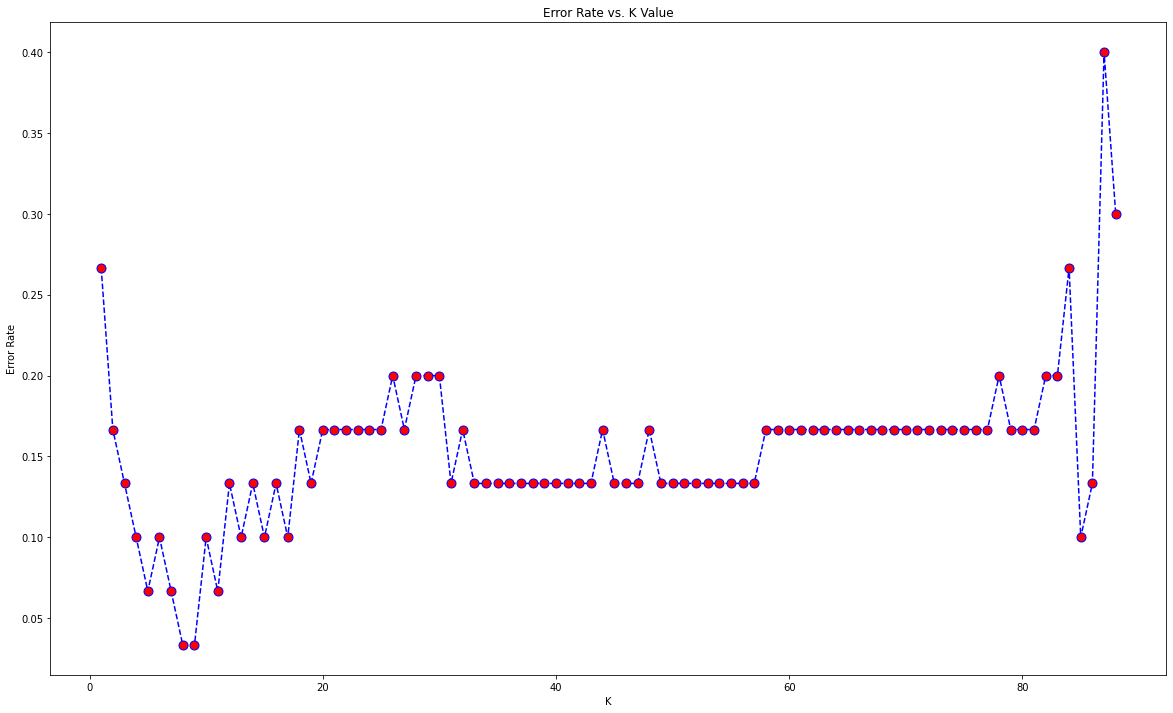

In [501]:
plt.figure(figsize=(20,12))
plt.plot(range(1,89),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=9)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)


In [502]:
classifier= KNeighborsClassifier(n_neighbors=40, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train) 
y_pred= classifier.predict(X_test)

In [503]:
print("KNN -", req_k_value, "neighbors Accuracy score")
print(accuracy_score(y_pred,y_test)*100, "%", sep="")


KNN - 8 neighbors Accuracy score
86.66666666666667%
